<a href="https://colab.research.google.com/github/isravazquez/equipo_3_datascience/blob/master/Postwork-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postwork 6

## Data Science on Bedu

## Integrantes:
* Arriaga Palma Fernando, arriaga141@gmail.com
* Hernández Angulo Juan de Jesus, jhernandezangulo@gmail.com
* Martínez Ibarra Hugo, hugomtzib@gmail.com
* Moreno Abrego Bryan Daniel, abre.go@outlook.com
* Silva Tijerina Gilberto, gilberto.silvat2812@gmail.com
* Vazquez Bernal Jaime Israel, israfullshot@gmail.com

---

Se usará la biblioteca `dplyr` y más adelante la biblioteca `zoo`

In [1]:
library(dplyr)
install.packages('zoo')
library(zoo)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Importa el conjunto de datos match.data.csv a R y realiza lo siguiente:

Se hace la lectura de los datos.

In [2]:
data_match <-
  read.csv("https://raw.githubusercontent.com/beduExpert/Programacion-R-Santander-2021/main/Sesion-06/Postwork/match.data.csv")

Se da el formato correcto a los datos de la columna fecha.

In [3]:
data_match <- mutate(data_match, date = as.Date(date, "%Y-%m-%d"))

**1.** Agrega una nueva columna sumagoles que contenga la suma de goles por partido.

Se suman los goles del equipo local y el visitante pro partido (renglón).

In [4]:
data_match$sumagoles <- data_match$home.score + data_match$away.score

**2.** Obtén el promedio por mes de la suma de goles.

Se realiza una agrupación por mes y año para obtener el promedio por mes.

In [5]:
promedio_por_mes <- data_match %>%
  mutate(month = format(date, "%m"), year = format(date, "%Y")) %>%
  group_by(month, year) %>%
  summarise(average = round(mean(sumagoles), 2))

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



**NOTA:** A continuación se realizará un pequeño análisis para remover un dato de promedio especificamente el del mes de junio del año 2013, pues complica el ordenamiento en la función de creación de serie de tiempo.

La siguiente función cuenta los partidos por mes.

In [6]:
partidos_por_mes <- data_match %>%
  mutate(fecha = format(date, "%Y-%m")) %>%
  group_by(fecha) %>%
  summarise(n_partidos = length(sumagoles))

Se calcula el promedio de partidos por mes.

In [7]:
prom <- mean(partidos_por_mes$n_partidos)

Ahora se calcula la desviación estándar del número de partidos por mes.

In [8]:
ds <- sd(partidos_por_mes$n_partidos)

Después, se calcula un intervalo de partidos jugados por mes considerando dos desviaciones de estándar alrededor del promedio.

In [9]:
(intervalo <- prom + c(-2,2)*ds)

[1] 16.22311 59.02442

In [10]:
(n_part_jun<-partidos_por_mes$n_partidos[partidos_por_mes$fecha=='2013-06'])

[1] 10

Como el numero de partidos de junio no entra en el intervalo de 2 desviaciones estandar de la media consideramos no incluirla, para asi poder trabajar más facilmente con la serie de tiempo

**3.** Crea la serie de tiempo del promedio por mes de la suma de goles hasta diciembre de 2019.

Se ordenan los datos por año.

In [11]:
promedio_por_mes <- promedio_por_mes[order(promedio_por_mes$year),]

Se elimina el dato de promedio del mes de junio de 2013, esto es, el dato 31 del data frame promedio_por_mes.

In [12]:
promedio_por_mes <- promedio_por_mes[-31,]

Se crea la serie de datos, dentro de las fechas indicadas. Además, se realiza 
la división cada 10 datos, que es la duración de cada temporada, agosto - mayo.

In [13]:
(sumagoles_mes <- ts(promedio_por_mes$average, start = c(2010,8), end = c(2019,5), fr = 10))

A Time Series:
 [1] 2.20 2.42 3.03 2.90 2.73 3.00 2.33 2.40 2.93 2.96 3.00 2.52 2.42 2.83 2.90
[16] 2.55 3.05 2.98 2.85 2.70 3.00 2.87 2.84 2.83 2.79 3.02 2.75 2.66 3.02 2.72
[31] 2.92 2.71 2.85 3.17 3.12 2.90 2.50 2.47 2.77 2.39 2.40 2.65 2.90 2.63 2.40
[46] 2.56 2.78 2.20 2.63 3.22 1.75 2.65 3.06 2.44 2.44 3.20 2.71 3.02 2.73 2.88
[61] 2.85 2.88 3.38 2.60 2.86 2.67 2.88 2.95 2.99 3.25 2.30 2.80 2.91 3.03 2.13
[76] 3.20 2.60 2.51 2.30 3.31 2.26 2.64 2.38 2.71 2.53 2.76 2.30 2.72

Se tomó la decisión de considerar sólo los datos de agosto 2010 a mayo 2019 porque estos representan correctamente temporadas de juego completas.

__NOTA:__ Además es la mejor decisión, pues el tratamiento de datos con las herramientas provistas en este módulo, necesita de valores espaciados de manera equitativa a través del tiempo.

__4.__ Se grafica la serie de tiempo.

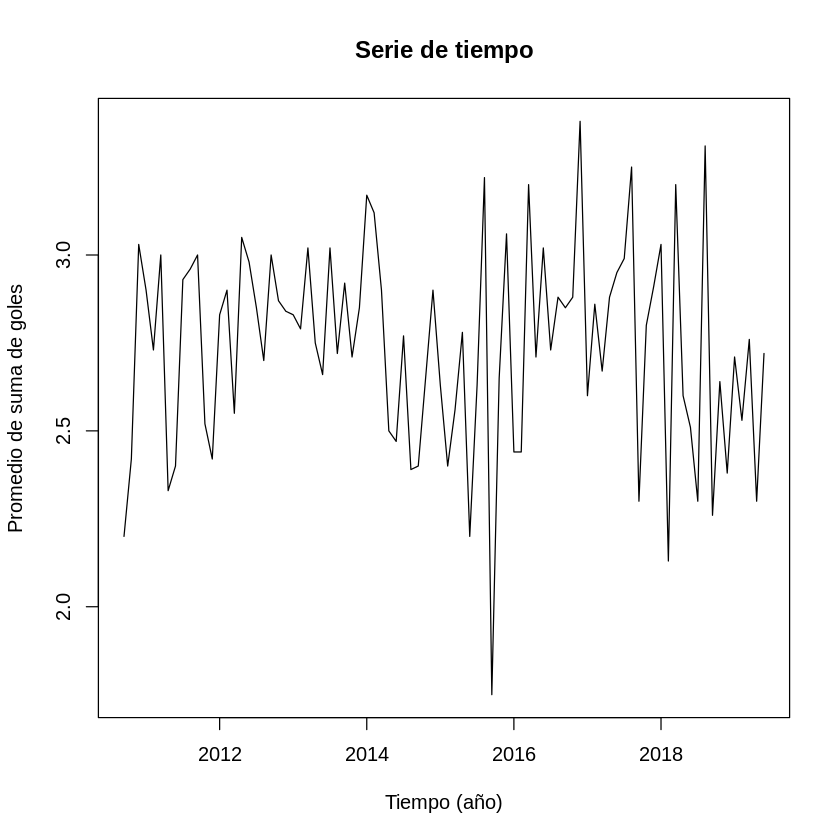

In [14]:
plot(sumagoles_mes, main = "Serie de tiempo", xlab = "Tiempo (año)", ylab = "Promedio de suma de goles")

Se lleva a cabo una descomposición de la serie de tiempo mediante el uso del método aditivo.

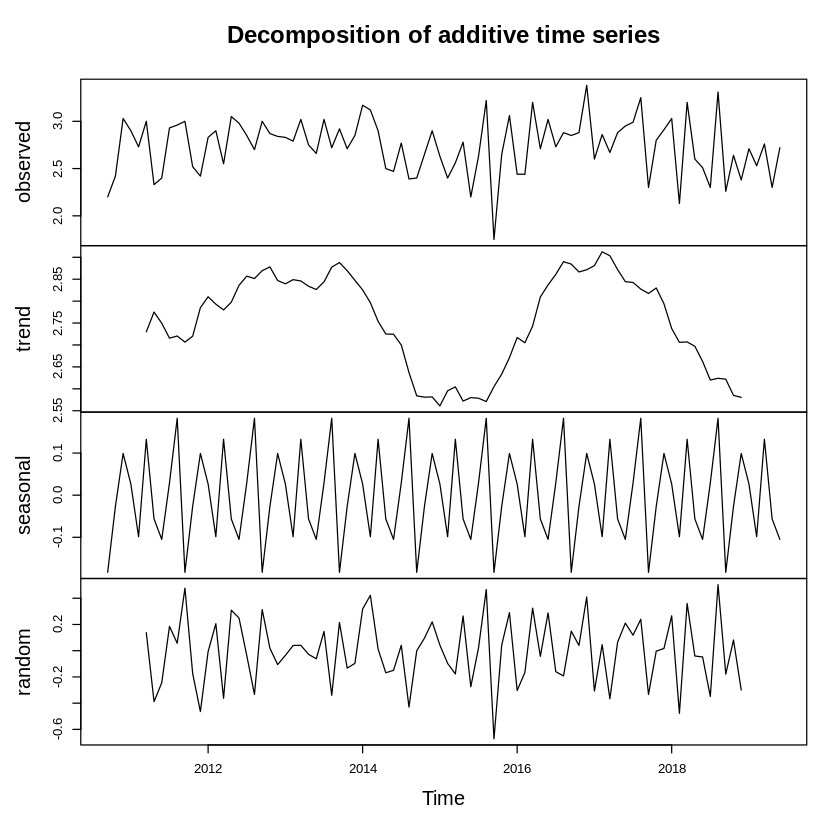

In [15]:
plots_ts <- decompose(sumagoles_mes)
plot(plots_ts)

Alternativamente, sí es necesario (según el objetivo que tenga el cliente acerca de la visualización de esos datos, hasta diciembre de 2019) entonces se puede sólo graficar los datos como tal para ver su comportamiento, sin preocuparse por su distribución en el tiempo, ya que el contexto de temporada está claro.

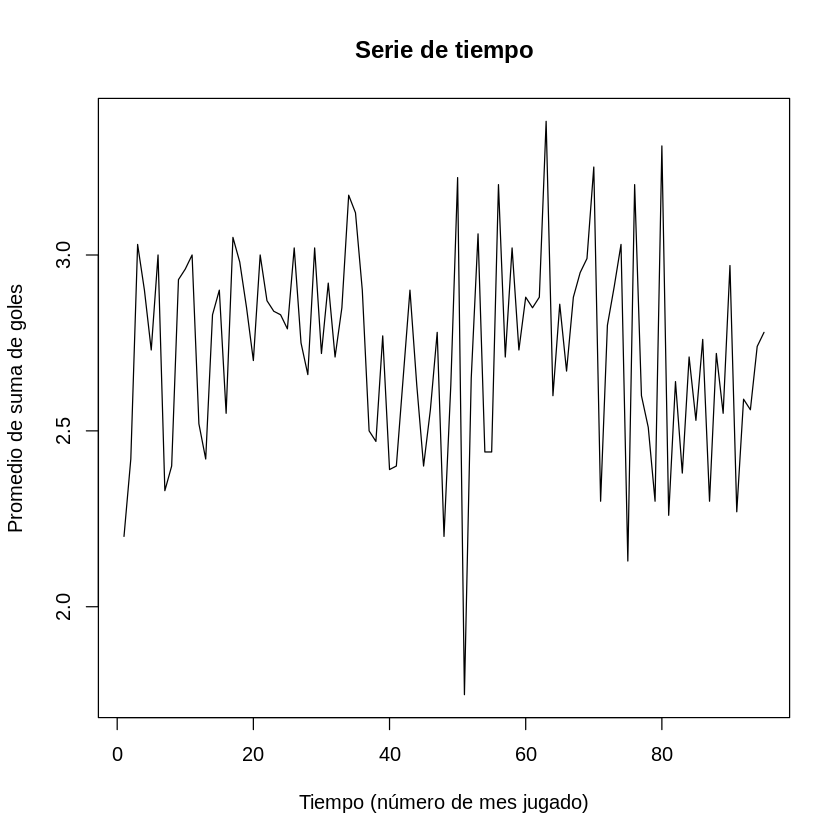

In [16]:
sumagoles_mes_alternativa <- zoo(promedio_por_mes[1:95,])
plot.ts(sumagoles_mes_alternativa$average,
        main = "Serie de tiempo",
        xlab = "Tiempo (número de mes jugado)",
        ylab = "Promedio de suma de goles")